In [2]:
import pathlib

import tqdm

import pandas as pd

from openff.evaluator.client.client import RequestResult
from openff.evaluator.datasets.datasets import PhysicalPropertyDataSet

from matplotlib import pyplot as plt

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [2]:
directory = pathlib.Path("optimize.tmp")

In [3]:
results_files = sorted(directory.glob("phys-prop/iter*/results.json"))

In [4]:
result_file = results_files[0]
result = RequestResult.from_json(result_file)
dataset = result.estimated_properties

In [3]:
reference = PhysicalPropertyDataSet.from_json("targets/phys-prop/training-set.json")

In [4]:
reference.properties[0]

In [13]:
data_over_iterations = {}
for prop in reference.properties:
    data_over_iterations[prop.id] = [prop.value]

for result_file in tqdm.tqdm(results_files):
    result = RequestResult.from_json(result_file)
    dataset = result.estimated_properties
    for prop in dataset.properties:
        data_over_iterations[prop.id].append(prop.value.m)

100%|█████████████████████████████████████████████| 7/7 [08:09<00:00, 69.89s/it]


In [16]:
for proplist in data_over_iterations.values():
    proplist[0] = proplist[0].m

In [18]:
iter_cols = [f"iter_{n}" for n in range(len(results_files))]

df = pd.DataFrame.from_dict(
    data_over_iterations,
    orient="index",
    columns=["Reference"] + iter_cols
)
df

,Reference,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6
6315,0.78660,0.778243,0.777642,0.771389,0.776932,0.777204,0.776174,0.777456
6316,0.62089,0.607746,0.603072,0.601683,0.600557,0.603288,0.602745,0.602114
6317,1.07647,1.080180,1.078090,1.080950,1.078539,1.080545,1.081356,1.081692
6318,1.03320,1.044202,1.032640,1.034068,1.032594,1.032007,1.036278,1.035816
6319,0.91415,0.947622,0.943668,0.932040,0.938412,0.940609,0.941613,0.941682
...,...,...,...,...,...,...,...,...
7342,0.59500,1.274928,1.301102,1.185829,1.194252,1.231046,1.251692,1.275869
7343,0.68200,1.292445,1.379352,1.294864,1.208991,1.199766,1.238293,1.109848
7344,-6.58800,-3.176862,-3.410467,-3.865501,-3.490017,-3.138785,-3.000318,-3.253049
7345,-5.54400,-2.570908,-3.086260,-3.624441,-3.315494,-2.859610,-2.852067,-2.968498


In [19]:
df.to_csv("training_per_iteration.csv")

In [25]:
density_indices = [
    i for i,x in enumerate(reference.properties)
    if "Density" in str(type(x))
]
len(density_indices)

555

In [41]:
df.Reference.values[density_indices]

array([0.7866  , 0.62089 , 1.07647 , 1.0332  , 0.91415 , 0.93618 ,
       1.69187 , 1.023   , 0.722814, 0.780566, 0.92701 , 0.9363  ,
       0.9822  , 0.7738  , 0.9659  , 0.98285 , 0.94381 , 0.79955 ,
       1.01179 , 1.093221, 1.12099 , 0.8646  , 2.169137, 0.76502 ,
       0.6879  , 0.9893  , 0.91417 , 0.99428 , 0.99428 , 0.9988  ,
       1.0713  , 1.059   , 1.02823 , 1.97022 , 1.81944 , 0.8998  ,
       0.9398  , 0.95261 , 0.871533, 0.71823 , 0.837096, 0.94987 ,
       0.94762 , 0.9855  , 0.84864 , 1.25852 , 0.96638 , 0.87357 ,
       0.73599 , 1.049603, 1.0414  , 1.24637 , 1.13332 , 1.0173  ,
       1.26683 , 1.1008  , 1.0442  , 0.83868 , 0.76057 , 0.945548,
       0.880817, 0.81262 , 0.91819 , 0.74    , 0.86914 , 0.92736 ,
       0.94067 , 0.66934 , 0.996   , 1.17834 , 0.903811, 0.858158,
       0.826047, 0.959   , 0.923722, 0.898903, 0.961569, 1.0301  ,
       1.0416  , 1.036   , 1.052255, 1.048636, 1.04051 , 0.99603 ,
       0.96881 , 0.94663 , 1.081   , 1.088   , 1.096367, 1.074

In [26]:
hmix_indices = [
    i for i, x in enumerate(reference.properties)
    if "Mixing" in str(type(x))
]
len(hmix_indices)

477

In [38]:
(df.Reference.values[hmix_indices] / 1.6) ** 2

array([2.61428477e+00, 2.59008789e+00, 6.07425391e-01, 1.86493164e+00,
       2.44922500e+00, 1.19628906e+00, 2.01462539e+00, 1.67702500e+00,
       5.20201562e-01, 1.96525352e+00, 2.45705625e+00, 5.80453516e-01,
       1.68837539e+00, 1.43400625e+00, 4.64953516e-01, 6.49031641e-01,
       5.82359766e-01, 2.74969141e-01, 6.82286325e-03, 1.51670001e-02,
       9.87327902e-03, 1.06031641e-01, 6.05478516e-01, 5.15703516e-01,
       3.57682656e-02, 1.43400625e-02, 4.14885977e-02, 1.94481000e-01,
       3.52539062e-01, 2.32143285e-01, 1.21854002e+00, 2.74109414e+00,
       1.05729806e+00, 1.07174391e-01, 2.74576000e-01, 1.79564063e-01,
       5.62312516e-01, 8.43068285e-01, 5.68233285e-01, 5.30150625e-02,
       9.54423789e-02, 5.76300039e-02, 1.39387539e-02, 3.48055664e-02,
       1.79057852e-02, 2.61440473e-01, 7.30383891e-01, 5.68893062e-01,
       8.35853063e-01, 1.78539704e+00, 1.50706314e+00, 7.89258789e+00,
       4.91453477e+00, 1.20039414e+00, 1.42072456e-01, 5.22693906e-02,
      

array([2.61428477e+00, 2.59008789e+00, 6.07425391e-01, 1.86493164e+00,
       2.44922500e+00, 1.19628906e+00, 2.01462539e+00, 1.67702500e+00,
       5.20201562e-01, 1.96525352e+00, 2.45705625e+00, 5.80453516e-01,
       1.68837539e+00, 1.43400625e+00, 4.64953516e-01, 6.49031641e-01,
       5.82359766e-01, 2.74969141e-01, 6.82286325e-03, 1.51670001e-02,
       9.87327902e-03, 1.06031641e-01, 6.05478516e-01, 5.15703516e-01,
       3.57682656e-02, 1.43400625e-02, 4.14885977e-02, 1.94481000e-01,
       3.52539062e-01, 2.32143285e-01, 1.21854002e+00, 2.74109414e+00,
       1.05729806e+00, 1.07174391e-01, 2.74576000e-01, 1.79564063e-01,
       5.62312516e-01, 8.43068285e-01, 5.68233285e-01, 5.30150625e-02,
       9.54423789e-02, 5.76300039e-02, 1.39387539e-02, 3.48055664e-02,
       1.79057852e-02, 2.61440473e-01, 7.30383891e-01, 5.68893062e-01,
       8.35853063e-01, 1.78539704e+00, 1.50706314e+00, 7.89258789e+00,
       4.91453477e+00, 1.20039414e+00, 1.42072456e-01, 5.22693906e-02,
      

In [28]:
rmsds = []
ref = df["Reference"].values
# density_indices = [
#     i for i, x in enumerate(ref)
#     if "gram" in str(x.units)
# ]
# hmix_indices = [
#     i for i, x in enumerate(ref)
#     if "gram" not in str(x.units)
# ]

ref_density = ref[density_indices]
ref_hmix = ref[hmix_indices]

data = {"density": [], "hmix": []}

for col in iter_cols:
    obs = df[col].values
    obs_density = obs[density_indices]
    obs_hmix = obs[hmix_indices]

    rmse_density = ((obs_density - ref_density) ** 2).mean() ** 0.5
    rmse_hmix = ((obs_hmix - ref_hmix) ** 2).mean() ** 0.5
    data["density"].append(rmse_density)
    data["hmix"].append(rmse_hmix)


rms_df = pd.DataFrame(data)
rms_df
    

,density,hmix
0,0.018052,0.867906
1,0.017549,0.833518
2,0.018067,0.805290
3,0.017976,0.808926
4,0.017065,0.828320
5,0.016699,0.843894
6,0.017277,0.815858


In [29]:
len(density_indices)

555

In [30]:
len(hmix_indices)

477

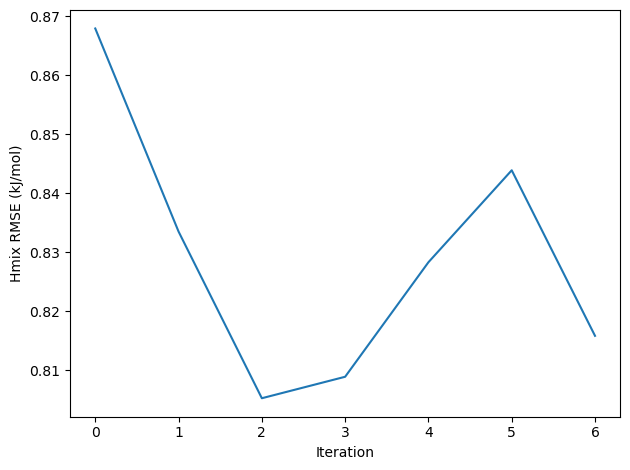

In [31]:
ax = rms_df.hmix.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Hmix RMSE (kJ/mol)")
plt.tight_layout()
# plt.savefig("hmix_rmse.png", dpi=300)

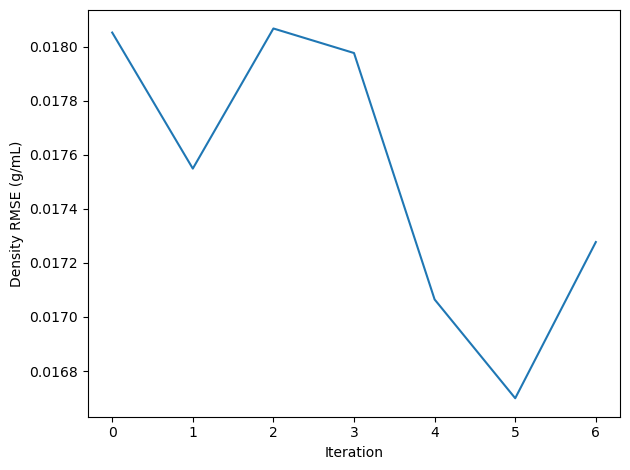

In [32]:
ax = rms_df.density.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Density RMSE (g/mL)")
plt.tight_layout()
# plt.savefig("density_rmse.png", dpi=300)